# hposuite Plotting and Comparison

## Loading and printing available Benchmarks and Optimizers in hposuite

In [2]:
from hposuite.benchmarks import BENCHMARKS
from hposuite.optimizers import OPTIMIZERS

print(BENCHMARKS.keys())
print(OPTIMIZERS.keys())

dict_keys(['ackley', 'branin', 'mfh3_bad', 'mfh6_bad', 'mfh3_good', 'mfh6_good', 'mfh3_moderate', 'mfh6_moderate', 'mfh3_terrible', 'mfh6_terrible', 'pd1-cifar100-wide_resnet-2048', 'pd1-imagenet-resnet-512', 'pd1-lm1b-transformer-2048', 'pd1-translate_wmt-xformer_translate-64', 'lcbench_tabular-adult', 'lcbench_tabular-airlines', 'lcbench_tabular-albert', 'lcbench_tabular-Amazon_employee_access', 'lcbench_tabular-APSFailure', 'lcbench_tabular-Australian', 'lcbench_tabular-bank-marketing', 'lcbench_tabular-blood-transfusion-service-center', 'lcbench_tabular-car', 'lcbench_tabular-christine', 'lcbench_tabular-cnae-9', 'lcbench_tabular-connect-4', 'lcbench_tabular-covertype', 'lcbench_tabular-credit-g', 'lcbench_tabular-dionis', 'lcbench_tabular-fabert', 'lcbench_tabular-Fashion-MNIST', 'lcbench_tabular-helena', 'lcbench_tabular-higgs', 'lcbench_tabular-jannis', 'lcbench_tabular-jasmine', 'lcbench_tabular-jungle_chess_2pcs_raw_endgame_complete', 'lcbench_tabular-kc1', 'lcbench_tabular-KD

## Comparing RandomSearch and RandomSearchWithPriors on Ackley Functional Benchmark

In [3]:
from hposuite import create_study

ackley = BENCHMARKS["ackley"]

study = create_study(
    name="ex-rs-comp",
    output_dir="example-outputs",
    optimizers=[
        "RandomSearch",
        "RandomSearchWithPriors",
    ],
    benchmarks=(
        "ackley",
        {
            "priors": (
                "y_optimum",
                {
                    "y": ackley.desc.predefined_points["min"]
                }
            )
        }
    ),
    num_seeds=5,
    budget=1000,
)

study.optimize(overwrite=True)

INFO:hposuite.study:Generated 10 runs
INFO:hposuite.study:Created study at /home/soham/repos/hposuite/examples/example-outputs/ex-rs-comp
INFO:hposuite.study:Dumped experiments to /home/soham/repos/hposuite/examples/example-outputs/ex-rs-comp/dump_all.txt
INFO:hposuite.study:Overwrite flag is set to True. Existing results will be overwritten!
INFO:hposuite.study:Running 10 experiments sequentially
INFO:hposuite.study:Running experiment 1/10
INFO:hposuite.run:Overwriting optimizer=RandomSearch.benchmark=ackley.objectives=y.TrialBudget=1000.seed=383329928 in `state=<State.COMPLETE: 'COMPLETE'>` at /home/soham/repos/hposuite/examples/example-outputs/ex-rs-comp/optimizer=RandomSearch.benchmark=ackley.objectives=y.TrialBudget=1000.seed=383329928.
INFO:hpoglue._run:COMPLETED running optimizer=RandomSearch.benchmark=ackley.objectives=y.TrialBudget=1000.seed=383329928
INFO:hposuite.run:Results dumped at /home/soham/repos/hposuite/examples/example-outputs/ex-rs-comp/optimizer=RandomSearch.bench

#### Plotting the results

In [1]:
!python -m hposuite.plotting.incumbent_trace --study_dir ex-rs-comp --output_dir example-outputs --figsize 10 7 --logscale

Some stuff might fail: issue in joblib
INFO:__main__:Found benchmarks: ['ackley']
INFO:__main__:Processing benchmark: ackley
INFO:__main__:Plotting RandomSearchWithPriors_default
INFO:__main__:Plotting RandomSearch_default
INFO:__main__:Saved plot to /home/soham/repos/hposuite/examples/example-outputs/ex-rs-comp/plots/RandomSearchWithPriors_default,RandomSearch_default.ackley, objective='y', fidelity=None, cost=None, TrialBudget=1000.0, to_minimize=True, error_bars='std'.png


#### Displaying the results

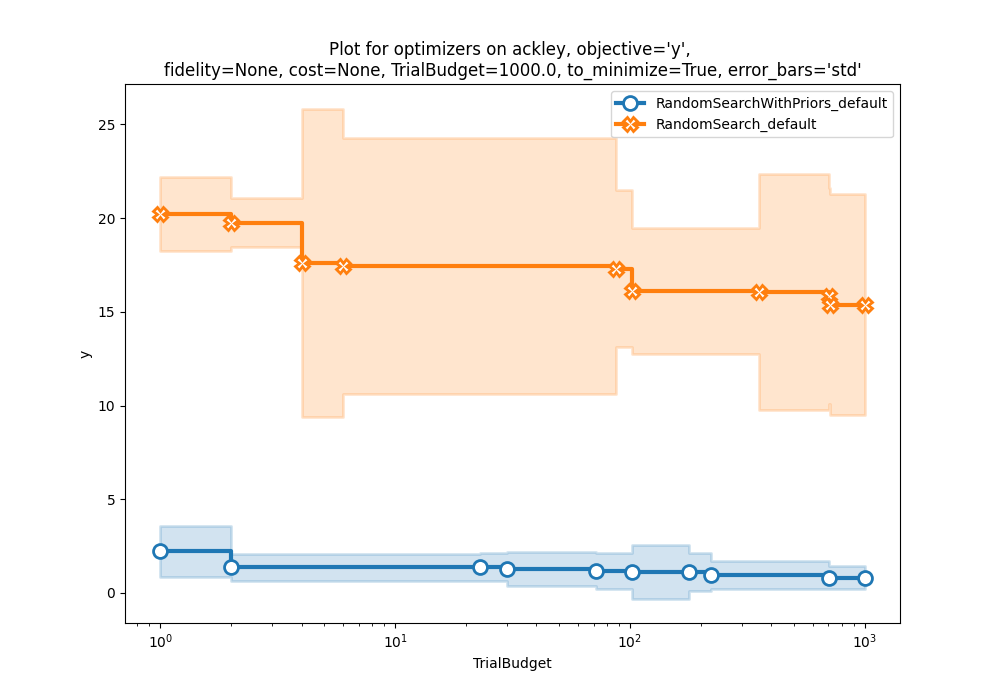

In [2]:
from IPython.display import Image

Image(
    filename="example-outputs/ex-rs-comp/plots/"
        "RandomSearchWithPriors_default,RandomSearch_default."
        "ackley, objective='y', fidelity=None, cost=None, TrialBudget=1000.0, "
        "to_minimize=True, error_bars='std'.png"
)

## Comparing the effect of Continuations using a Multi-fidelity Optimizer

For this example we use the DEHB on the PD1 Cifar100 Wide Resnet 2048 Benchmark \
In hposuite, continuations is set to True by default for each run, unless the optimizer doesn't support it. In that case, it automatically gets set to False.

#### Creating and Running the Study

In [3]:
from hposuite import create_study

study = create_study(
    name="continuations-comp",
    output_dir="example-outputs",
    optimizers="DEHB",
    benchmarks=(
        "pd1-cifar100-wide_resnet-2048",
        {
            "objectives": "valid_error_rate"
        }
    ),
    num_seeds=5,
    budget=100,
)

study.optimize(overwrite=True)

Some stuff might fail: issue in joblib


INFO:hposuite.study:Generated 5 runs
INFO:hposuite.study:Created study at /home/soham/repos/hposuite/examples/example-outputs/continuations-comp
INFO:hposuite.study:Dumped experiments to /home/soham/repos/hposuite/examples/example-outputs/continuations-comp/dump_all.txt
INFO:hposuite.study:Overwrite flag is set to True. Existing results will be overwritten!
INFO:hposuite.study:Running 5 experiments sequentially
INFO:hposuite.study:Running experiment 1/5
INFO:hposuite.run:Overwriting optimizer=DEHB.benchmark=pd1-cifar100-wide_resnet-2048.objectives=valid_error_rate.fidelities=epoch.TrialBudget=100.seed=383329928 in `state=<State.PENDING: 'PENDING'>` at /home/soham/repos/hposuite/examples/example-outputs/continuations-comp/optimizer=DEHB.benchmark=pd1-cifar100-wide_resnet-2048.objectives=valid_error_rate.fidelities=epoch.TrialBudget=100.seed=383329928.


2025-03-17 14:45:16.100 | WARNING  | dehb.optimizers.dehb:__init__:264 - A checkpoint already exists, results could potentially be overwritten.


INFO:hpoglue._run:COMPLETED running optimizer=DEHB.benchmark=pd1-cifar100-wide_resnet-2048.objectives=valid_error_rate.fidelities=epoch.TrialBudget=100.seed=383329928
INFO:hposuite.run:Results dumped at /home/soham/repos/hposuite/examples/example-outputs/continuations-comp/optimizer=DEHB.benchmark=pd1-cifar100-wide_resnet-2048.objectives=valid_error_rate.fidelities=epoch.TrialBudget=100.seed=383329928/optimizer=DEHB.benchmark=pd1-cifar100-wide_resnet-2048.objectives=valid_error_rate.fidelities=epoch.TrialBudget=100.seed=383329928.parquet
INFO:hposuite.study:Running experiment 2/5
INFO:hposuite.run:Overwriting optimizer=DEHB.benchmark=pd1-cifar100-wide_resnet-2048.objectives=valid_error_rate.fidelities=epoch.TrialBudget=100.seed=3324115917 in `state=<State.PENDING: 'PENDING'>` at /home/soham/repos/hposuite/examples/example-outputs/continuations-comp/optimizer=DEHB.benchmark=pd1-cifar100-wide_resnet-2048.objectives=valid_error_rate.fidelities=epoch.TrialBudget=100.seed=3324115917.
INFO:h

#### Plotting the Results

In [3]:
!python -m hposuite.plotting.incumbent_trace --study_dir continuations-comp --output_dir example-outputs --figsize 12 7

Some stuff might fail: issue in joblib
INFO:__main__:Found benchmarks: ['pd1-cifar100-wide_resnet-2048']
INFO:__main__:Processing benchmark: pd1-cifar100-wide_resnet-2048
INFO:__main__:Plotting DEHB_default
INFO:__main__:Saved plot to /home/soham/repos/hposuite/examples/example-outputs/continuations-comp/plots/DEHB_default.pd1-cifar100-wide_resnet-2048, objective='valid_error_rate', fidelity='epoch', cost=None, FidelityBudget=19110.0, to_minimize=True, error_bars='std'.png


#### Displaying the Results

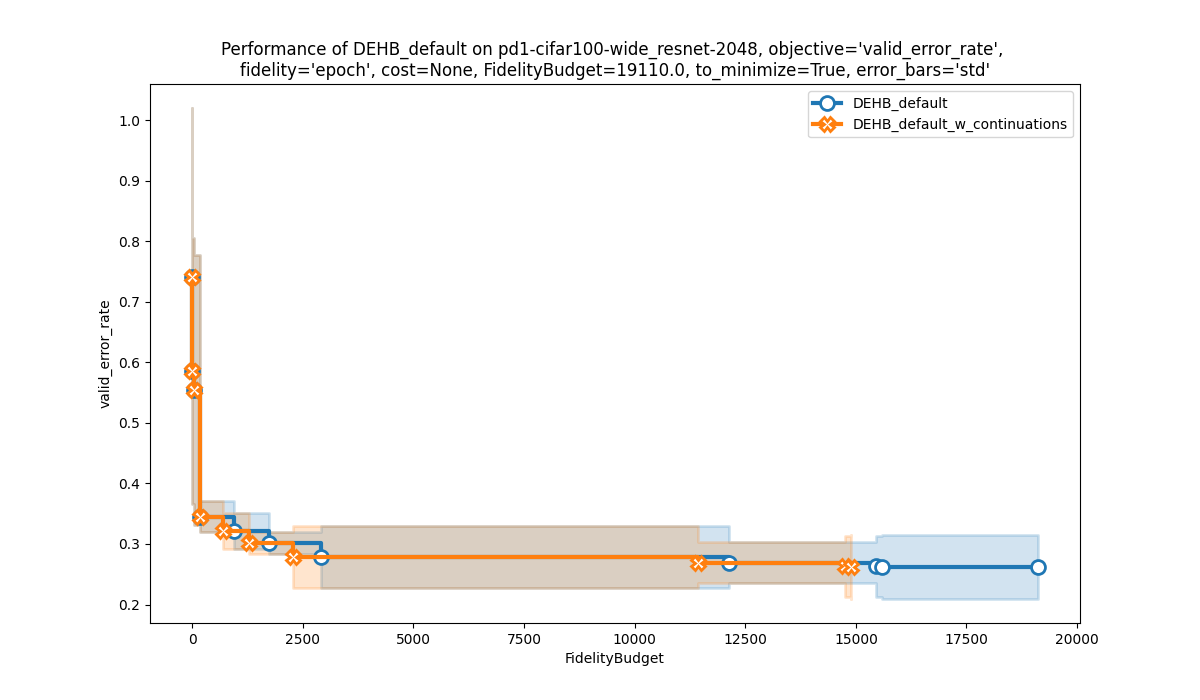

In [4]:
from IPython.display import Image

Image(
    filename="example-outputs/continuations-comp/plots/DEHB_default."
        "pd1-cifar100-wide_resnet-2048, objective='valid_error_rate', "
        "fidelity='epoch', cost=None, FidelityBudget=19110.0, "
        "to_minimize=True, error_bars='std'.png"
)